In [5]:
!pip install bs4
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.2 MB/s  eta 0:00:01


In [2]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd

In [3]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

soup = BeautifulSoup(page, "html.parser")

soup.title

table=soup.find('table')
table_contents=[]
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)


df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [4]:
# The code was removed by Watson Studio for sharing.

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


### Folium map

- This maps shows central points of Toronto post code areas

In [ ]:
latitude = 43.651070
longitude =  -79.347015

toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for i in range(0,len(toronto_df)):
   folium.Marker(
      location=[toronto_df.iloc[i]['Latitude'], toronto_df.iloc[i]['Longitude']],
   ).add_to(toronto_map)


toronto_map

### KMeans clustering

- The Kmeans application aims to cluster Toronto area post code to optimal number of districts on geographical coordinates
- Elbow method is used to check optimal number of clusters
- Clusters are assigned and presented in following dataframe and scatter plot

###### Results:
    
Results indicate that Toronto could be split into four district clusters

- Western
- Northern
- Southern
- Eastern

Text(0.5, 1.0, 'Elbow method for Optimizing K (Centroids amount)')

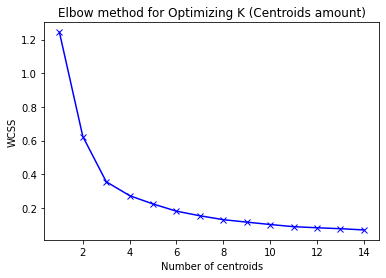

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

cluster_df = toronto_df.copy()

y11 = cluster_df['Latitude']
x11 = cluster_df['Longitude']

clustering_data =  pd.DataFrame([x11, y11]).transpose()
cluster_array = np.array(clustering_data)

wcss = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_array)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow method for Optimizing K (Centroids amount)')



,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster
0,M3A,North York,Parkwoods,43.753259,-79.329656,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,3
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1


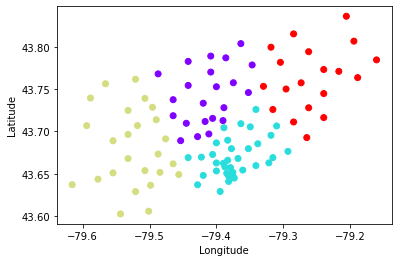

In [17]:
cluster_number = 4
kmeans = KMeans(n_clusters = cluster_number)
kmeans.fit(cluster_array)

plt.scatter(cluster_array[:,0],cluster_array[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.title('Clustering days')

toronto_df['Cluster'] = kmeans.labels_
toronto_df.head()